In [30]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
import keras.backend as K

In [31]:
train_da, test_da = mnist.load_data()
x_train, y_train = train_da 
x_test, y_test = test_da

5 0 4 1
9 2 1 3
1 4 3 5
3 6 1 7


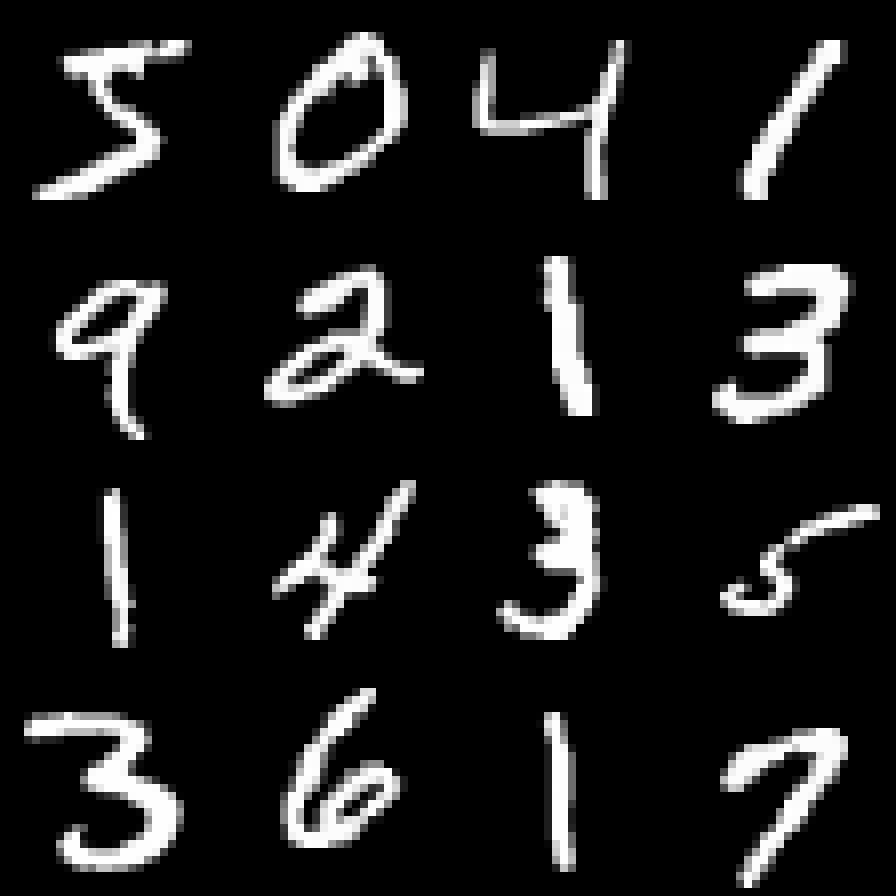

In [32]:
from IPython.display import Image
from PIL import Image
import numpy as np
a = np.concatenate(x_train[0:4], axis=1)
print(" ".join([str(x) for x in y_train[0:4]]))
for i in range(3):
    a = np.concatenate([a, np.concatenate(x_train[4+i*4:8+i*4], axis=1)], axis=0)
    print(" ".join([str(x) for x in y_train[4+i*4:8+i*4]]))
img = Image.fromarray(a, 'L')
img.resize((896, 896), Image.NEAREST)

In [33]:
data_format = K.image_data_format()
rows, cols = 28, 28
num_classes = 10
train_size = x_train.shape[0]
test_size = x_test.shape[0]

if data_format == 'channels_first':
    x_train = x_train.reshape(train_size, 1, rows, cols)
    x_test = x_test.reshape(test_size, 1, rows, cols)
    input_shape = (1, rows, cols)
else:
    x_train = x_train.reshape(train_size, rows, cols, 1)
    x_test = x_test.reshape(test_size, rows, cols, 1)
    input_shape = (rows, cols, 1)
    
# norm data to float in range 0..1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to one hot vector
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [34]:
x_train = x_train[:128]
y_train = y_train[:128]

In [35]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


In [36]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

In [37]:
batch_size = 128
epochs = 20

In [38]:
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

Train on 128 samples, validate on 10000 samples
Epoch 1/20
128/128 [==============================] - 0s 2ms/step - loss: 2.3562 - acc: 0.1172 - val_loss: 2.3730 - val_acc: 0.1290
Epoch 2/20
128/128 [==============================] - 0s 318us/step - loss: 2.2826 - acc: 0.1328 - val_loss: 2.3251 - val_acc: 0.1419
Epoch 3/20
128/128 [==============================] - 0s 287us/step - loss: 2.2123 - acc: 0.2031 - val_loss: 2.2804 - val_acc: 0.1612
Epoch 4/20
128/128 [==============================] - 0s 335us/step - loss: 2.1451 - acc: 0.2266 - val_loss: 2.2386 - val_acc: 0.1911
Epoch 5/20
128/128 [==============================] - 0s 340us/step - loss: 2.0810 - acc: 0.2734 - val_loss: 2.1995 - val_acc: 0.2353
Epoch 6/20
128/128 [==============================] - 0s 353us/step - loss: 2.0198 - acc: 0.3438 - val_loss: 2.1626 - val_acc: 0.2797
Epoch 7/20
128/128 [==============================] - 0s 402us/step - loss: 1.9611 - acc: 0.4062 - val_loss: 2.1277 - val_acc: 0.3130
Epoch 8/20
128/1

In [39]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.7635096961975099
Test accuracy: 0.5429


In [40]:
from pandas import DataFrame
df_loss = DataFrame(data={
    'Epoche': history.epoch * 2,
    'Legende': ['Loss auf Trainingsdaten'] * len(history.epoch) + ['Loss auf Testdaten'] * len(history.epoch),
    'Loss': history.history['loss'] + history.history['val_loss']
})
df_accuracy = DataFrame(data={
    'Epoche': history.epoch * 2,
    'Legende': ['Accuracy auf Trainingsdaten'] * len(history.epoch) + ['Accuracy auf Testdaten'] * len(history.epoch),
    'Accuracy': history.history['acc'] + history.history['val_acc']
})
print(df_loss)
print(df_accuracy)

    Epoche                  Legende      Loss
0        0  Loss auf Trainingsdaten  2.356192
1        1  Loss auf Trainingsdaten  2.282586
2        2  Loss auf Trainingsdaten  2.212254
3        3  Loss auf Trainingsdaten  2.145113
4        4  Loss auf Trainingsdaten  2.081011
5        5  Loss auf Trainingsdaten  2.019757
6        6  Loss auf Trainingsdaten  1.961145
7        7  Loss auf Trainingsdaten  1.904972
8        8  Loss auf Trainingsdaten  1.851042
9        9  Loss auf Trainingsdaten  1.799165
10      10  Loss auf Trainingsdaten  1.749161
11      11  Loss auf Trainingsdaten  1.700856
12      12  Loss auf Trainingsdaten  1.654093
13      13  Loss auf Trainingsdaten  1.608734
14      14  Loss auf Trainingsdaten  1.564664
15      15  Loss auf Trainingsdaten  1.521795
16      16  Loss auf Trainingsdaten  1.480065
17      17  Loss auf Trainingsdaten  1.439434
18      18  Loss auf Trainingsdaten  1.399886
19      19  Loss auf Trainingsdaten  1.361418
20       0       Loss auf Testdate

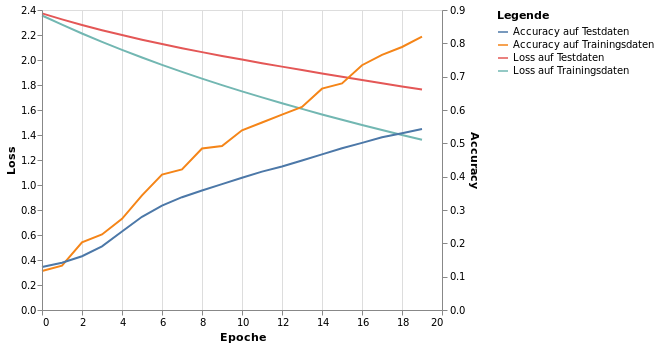

In [41]:
import altair as alt
alt.renderers.enable('notebook')

chart_loss = alt.Chart(df_loss).mark_line().encode(
    x='Epoche', y='Loss', color='Legende')
chart_accuracy = alt.Chart(df_accuracy).mark_line().encode(
    x='Epoche', y='Accuracy', color='Legende')
chart = chart_loss + chart_accuracy
chart.resolve_scale(y='independent')

In [42]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [43]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

Train on 128 samples, validate on 10000 samples
Epoch 1/20
128/128 [==============================] - 0s 3ms/step - loss: 2.4310 - acc: 0.0703 - val_loss: 2.3446 - val_acc: 0.1159
Epoch 2/20
128/128 [==============================] - 0s 687us/step - loss: 2.2477 - acc: 0.1484 - val_loss: 2.2232 - val_acc: 0.1992
Epoch 3/20
128/128 [==============================] - 0s 546us/step - loss: 2.0413 - acc: 0.3359 - val_loss: 2.1294 - val_acc: 0.2575
Epoch 4/20
128/128 [==============================] - 0s 641us/step - loss: 1.8692 - acc: 0.5078 - val_loss: 2.0554 - val_acc: 0.3263
Epoch 5/20
128/128 [==============================] - 0s 499us/step - loss: 1.7299 - acc: 0.6016 - val_loss: 1.9826 - val_acc: 0.3880
Epoch 6/20
128/128 [==============================] - 0s 512us/step - loss: 1.5954 - acc: 0.6484 - val_loss: 1.9114 - val_acc: 0.4304
Epoch 7/20
128/128 [==============================] - 0s 690us/step - loss: 1.4700 - acc: 0.6875 - val_loss: 1.8399 - val_acc: 0.4655
Epoch 8/20
128/1

In [44]:
def evaluate(model, history):
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    df_loss = DataFrame(data={
        'Epoche': history.epoch * 2,
        'Legende': ['Loss auf Trainingsdaten'] * len(history.epoch) + ['Loss auf Testdaten'] * len(history.epoch),
        'Loss': history.history['loss'] + history.history['val_loss']
    })
    df_accuracy = DataFrame(data={
        'Epoche': history.epoch * 2,
        'Legende': ['Accuracy auf Trainingsdaten'] * len(history.epoch) + ['Accuracy auf Testdaten'] * len(history.epoch),
        'Accuracy': history.history['acc'] + history.history['val_acc']
    })
    chart_loss = alt.Chart(df_loss).mark_line().encode(
        x='Epoche', y='Loss', color='Legende')
    chart_accuracy = alt.Chart(df_accuracy).mark_line().encode(
        x='Epoche', y='Accuracy', color='Legende')
    chart = chart_loss + chart_accuracy
    return chart.resolve_scale(y='independent')

Test loss: 1.156489528465271
Test accuracy: 0.6663


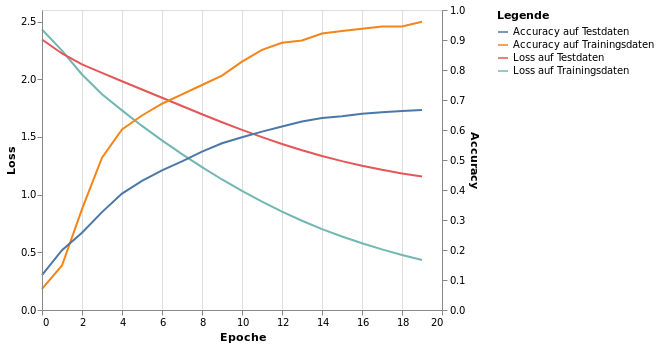

In [45]:
evaluate(model, history)

In [51]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

train_size = x_train.shape[0]
test_size = x_test.shape[0]

data_format = K.image_data_format()
if data_format == 'channels_first':
    x_train = x_train.reshape(train_size, 1, rows, cols)
    x_test = x_test.reshape(test_size, 1, rows, cols)
    input_shape = (1, rows, cols)
else:
    x_train = x_train.reshape(train_size, rows, cols, 1)
    x_test = x_test.reshape(test_size, rows, cols, 1)
    input_shape = (rows, cols, 1)
    
# norm data to float in range 0..1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to one hot vector
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [62]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [59]:
batch_size = 128
epochs = 12

model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 2s 34us/step - loss: 0.5043 - acc: 0.8496 - val_loss: 0.2150 - val_acc: 0.9369
Epoch 2/12
60000/60000 [==============================] - 2s 26us/step - loss: 0.2670 - acc: 0.9237 - val_loss: 0.1574 - val_acc: 0.9533
Epoch 3/12
60000/60000 [==============================] - 2s 25us/step - loss: 0.2164 - acc: 0.9371 - val_loss: 0.1320 - val_acc: 0.9604
Epoch 4/12
60000/60000 [==============================] - 2s 26us/step - loss: 0.1892 - acc: 0.9452 - val_loss: 0.1161 - val_acc: 0.9644
Epoch 5/12
60000/60000 [==============================] - 2s 26us/step - loss: 0.1680 - acc: 0.9505 - val_loss: 0.1063 - val_acc: 0.9676
Epoch 6/12
60000/60000 [==============================] - 2s 27us/step - loss: 0.1579 - acc: 0.9531 - val_loss: 0.1005 - val_acc: 0.9696
Epoch 7/12
60000/60000 [==============================] - 2s 26us/step - loss: 0.1446 - acc: 0.9576 - val_loss: 0.0939 - val_acc

Test loss: 0.08017812022778671
Test accuracy: 0.9762


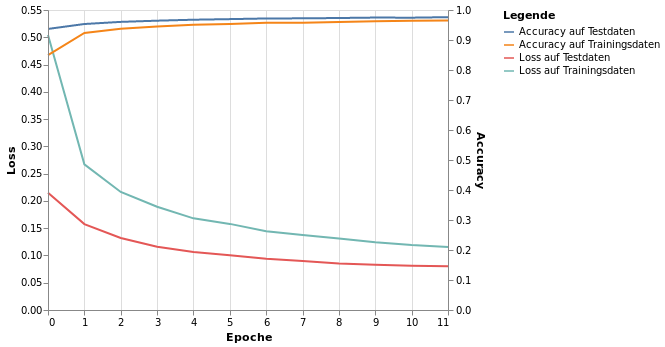

In [60]:
evaluate(model, history)

In [63]:
model = Sequential()
model.add(Conv2D(
             32, kernel_size=(3, 3), 
             activation='relu', 
             input_shape=input_shape))
model.add(Conv2D(
             64, kernel_size=(3, 3), 
             activation='relu'))
model.add(MaxPooling2D(
             pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
__________

In [ ]:
batch_size = 128
epochs = 12

model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 75s 1ms/step - loss: 0.2429 - acc: 0.9255 - val_loss: 0.0567 - val_acc: 0.9818
Epoch 2/12
27392/60000 [============>.................] - ETA: 39s - loss: 0.0906 - acc: 0.9734

In [ ]:
evaluate(model, history)